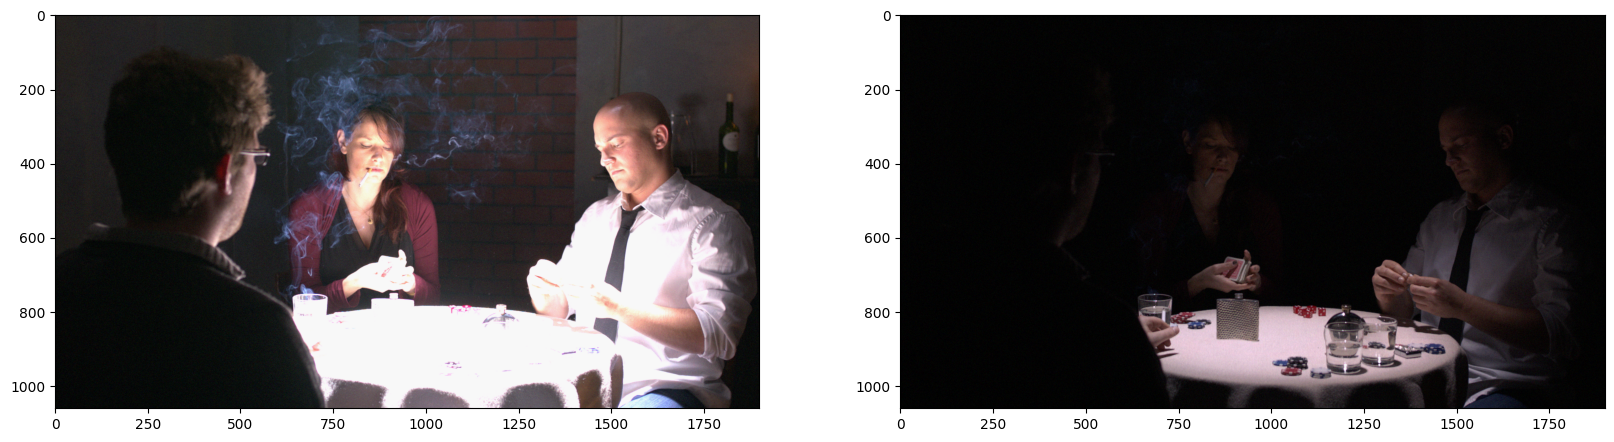

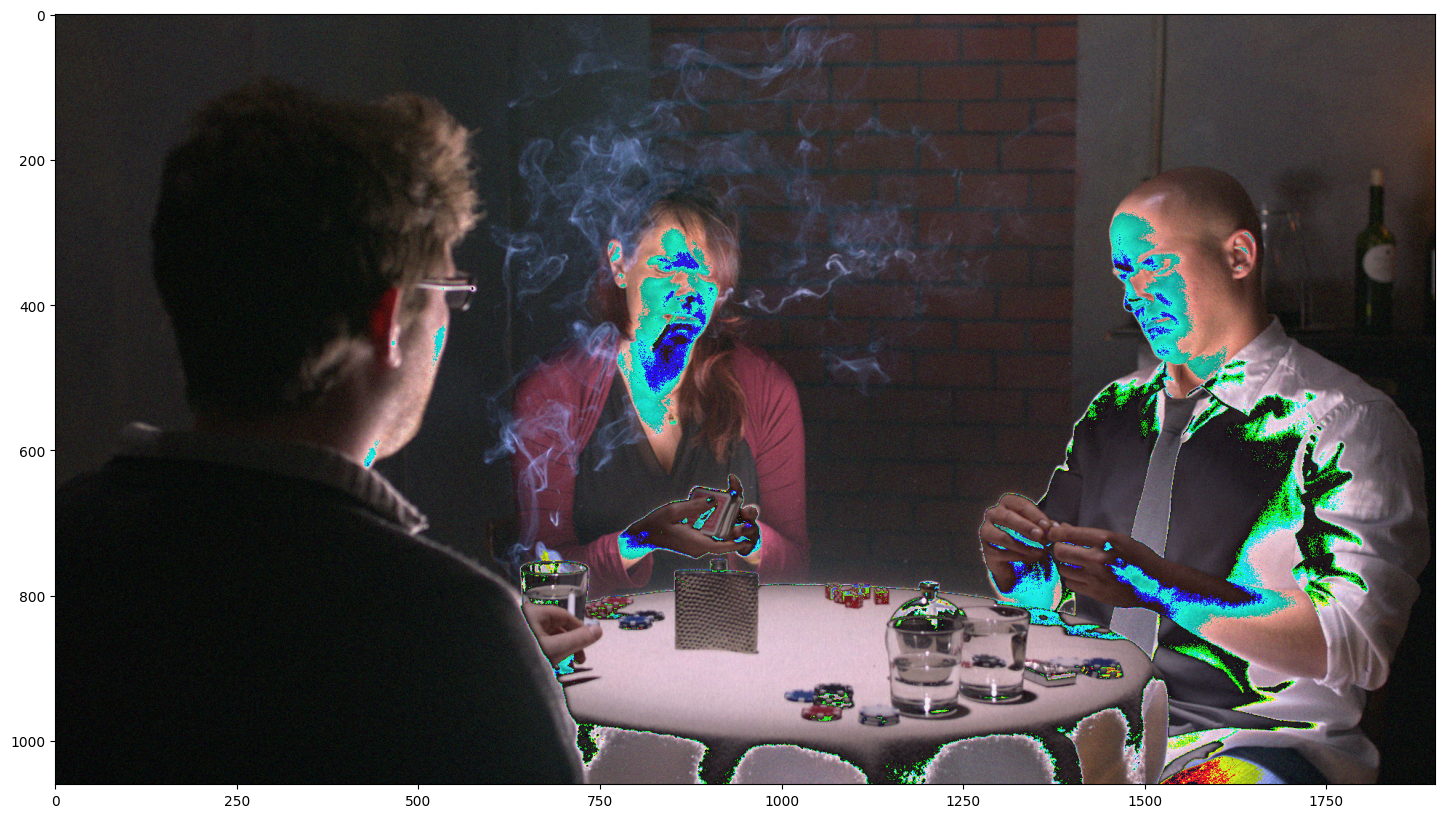

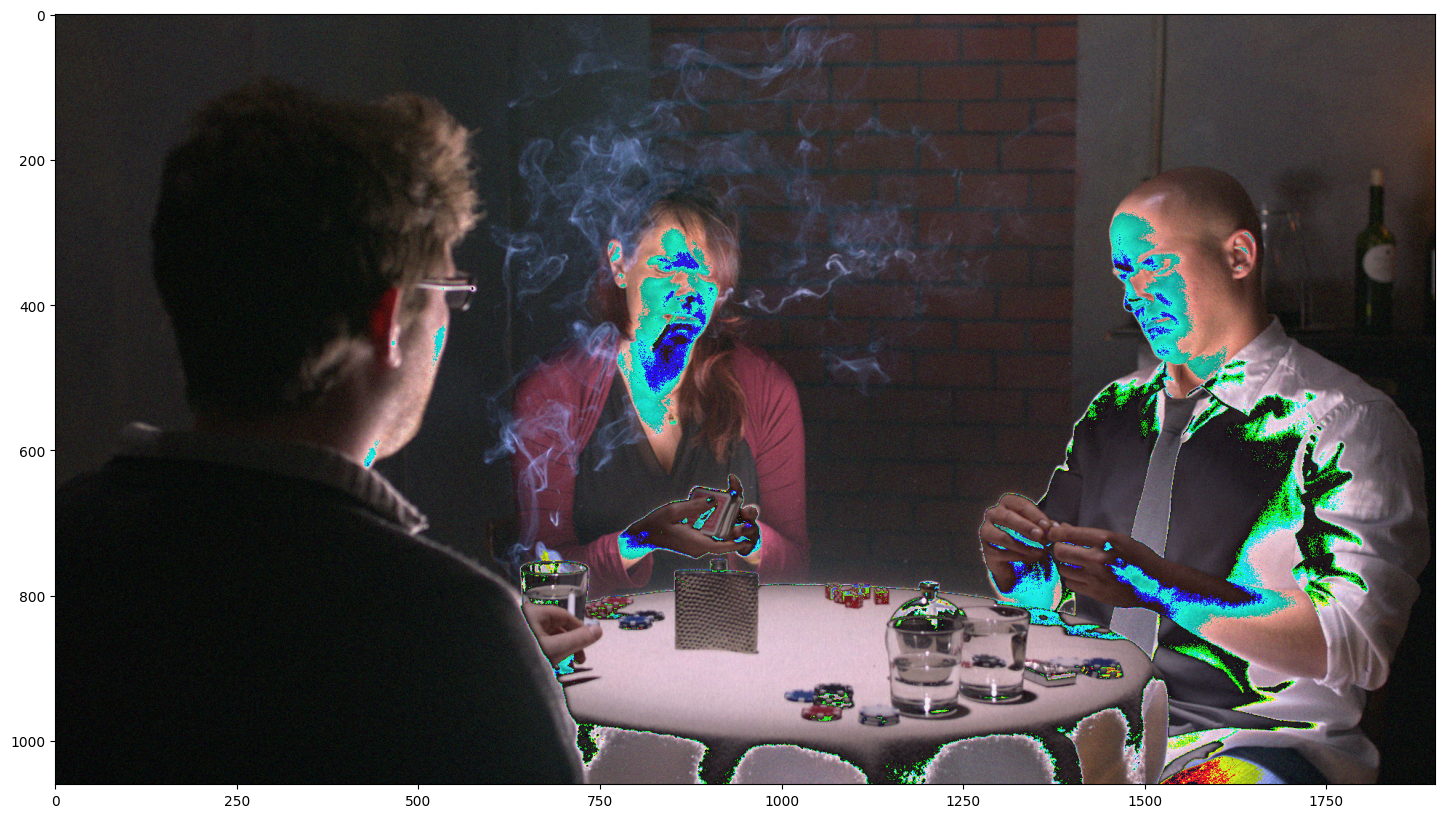

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

# 确保图像路径正确
image_paths = ['D:/Downloads/HDR-VAM-main/NTIRE22_HDR_valid_input/0000_long.png',
                'D:/Downloads/HDR-VAM-main/NTIRE22_HDR_valid_input/0000_short.png']

images = [cv2.imread(x) for x in image_paths]


# 将图像从 BGR 颜色空间转换为 RGB 颜色空间

images[0] = cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB)
images[1] = cv2.cvtColor(images[1], cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(images[0])

plt.subplot(1, 2, 2)
plt.imshow(images[1])


plt.figure(figsize=(20, 10))

# 合并图像
img1 = images[0] + images[1]
img2 = cv2.add(images[0],images[1])
# 显示合并后的图像
plt.imshow(img1)
# 显示图像
plt.show()
plt.figure(figsize=(20, 10))
# 显示合并后的图像
plt.imshow(img1)
# 显示图像
plt.show()

In [3]:

 
#img1 = cv2.imread('D:/Downloads/HDR-VAM-main/NTIRE22_HDR_valid_input/0000_long.png')
#img2 = cv2.imread('D:/Downloads/HDR-VAM-main/NTIRE22_HDR_valid_input/0000_medium.png')
 

from __future__ import print_function
import cv2
import numpy as np


MAX_FEATURES = 500
GOOD_MATCH_PERCENT = 0.15


def alignImages(im1, im2):
  # Convert images to grayscale
  im1Gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
  im2Gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

  # Detect ORB features and compute descriptors.
  orb = cv2.ORB_create(MAX_FEATURES)
  keypoints1, descriptors1 = orb.detectAndCompute(im1Gray, None)
  keypoints2, descriptors2 = orb.detectAndCompute(im2Gray, None)

  # Match features.
  matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
  matches = matcher.match(descriptors1, descriptors2, None)

  # Sort matches by score
  matches = list(matches)
  matches.sort(key=lambda x: x.distance, reverse=False)

  # Remove not so good matches
  numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
  matches = matches[:numGoodMatches]

  # Draw top matches
  imMatches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)
  cv2.imwrite("matches.png", imMatches)

  # Extract location of good matches
  points1 = np.zeros((len(matches), 2), dtype=np.float32)
  points2 = np.zeros((len(matches), 2), dtype=np.float32)

  for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

  # Find homography
  h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

  # Use homography
  height, width, channels = im2.shape
  im1Reg = cv2.warpPerspective(im1, h, (width, height))

  return im1Reg, h


if __name__ == '__main__':

  # Read reference image
  refFilename = "D:/Downloads/HDR-VAM-main/NTIRE22_HDR_valid_input/0000_long.png"
  print("Reading reference image : ", refFilename)
  imReference = cv2.imread(refFilename, cv2.IMREAD_COLOR)

  # Read image to be aligned
  imFilename = "D:/Downloads/HDR-VAM-main/NTIRE22_HDR_valid_input/0000_medium.png"
  print("Reading image to align : ", imFilename);  
  im = cv2.imread(imFilename, cv2.IMREAD_COLOR)

  print("Aligning images ...")
  # Registered image will be resotred in imReg. 
  # The estimated homography will be stored in h. 
  imReg, h = alignImages(im, imReference)

  # Write aligned image to disk. 
  outFilename = "aligned.png"
  print("Saving aligned image : ", outFilename); 
  cv2.imwrite(outFilename, imReg)

  # Print estimated homography
  print("Estimated homography : \n",  h)

Reading reference image :  D:/Downloads/HDR-VAM-main/NTIRE22_HDR_valid_input/0000_long.png
Reading image to align :  D:/Downloads/HDR-VAM-main/NTIRE22_HDR_valid_input/0000_medium.png
Aligning images ...
Saving aligned image :  aligned.png
Estimated homography : 
 [[ 5.75786067e-01 -1.43137215e-01  2.38946554e+02]
 [-1.11603607e-01  6.21306790e-01  1.76270933e+02]
 [-1.76996408e-04 -1.57756631e-04  1.00000000e+00]]
